#Importando a biblioteca Numpy

#Numpy
(Numerical Python) é uma biblioteca do python que fornece suporte a arrays multidimensionais, estruturas de dados mais avançadas e eficientes para cálculos numéricos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
url = 'https://raw.githubusercontent.com/Projeto-Integrado-IV/dados_pi/main/raw/obitosinfantis_periodo.csv'

In [7]:
dado = pd.read_csv(url, delimiter=';', encoding='latin1')

In [8]:
dado = dado.rename(columns={'obitos menores de 1 Ano': 'obitos_totais'})

In [9]:
dado

,cod_ibge,ano,obitos_totais,obitos menores de 7 dias,obitos de 28 dias a 364 dias,obitos de 7 a 27 dias,nascidos vivos (por local de residência)
0,3500000,2022,4.0,4.0,0.0,0.0,188.0
1,3500105,2022,4.0,2.0,1.0,1.0,388.0
2,3500204,2022,0.0,0.0,0.0,0.0,58.0
3,3500303,2022,3.0,2.0,0.0,1.0,390.0
4,3500402,2022,1.0,0.0,0.0,1.0,69.0
...,...,...,...,...,...,...,...
14853,3557006,2000,30.0,10.0,12.0,8.0,1936.0
14854,3557105,2000,9.0,6.0,2.0,1.0,1001.0
14855,3557154,2000,0.0,0.0,0.0,0.0,21.0
14856,3557204,2000,4.0,1.0,1.0,2.0,199.0


In [10]:
df_filter = dado[dado['cod_ibge'] == 3500709]

In [11]:
df_filter.head()

,cod_ibge,ano,obitos_totais,obitos menores de 7 dias,obitos de 28 dias a 364 dias,obitos de 7 a 27 dias,nascidos vivos (por local de residência)
8,3500709,2022,3.0,2.0,1.0,0.0,473.0
654,3500709,2021,9.0,6.0,2.0,1.0,490.0
1300,3500709,2020,9.0,7.0,1.0,1.0,486.0
1946,3500709,2019,7.0,1.0,2.0,4.0,524.0
2592,3500709,2018,9.0,2.0,5.0,2.0,530.0


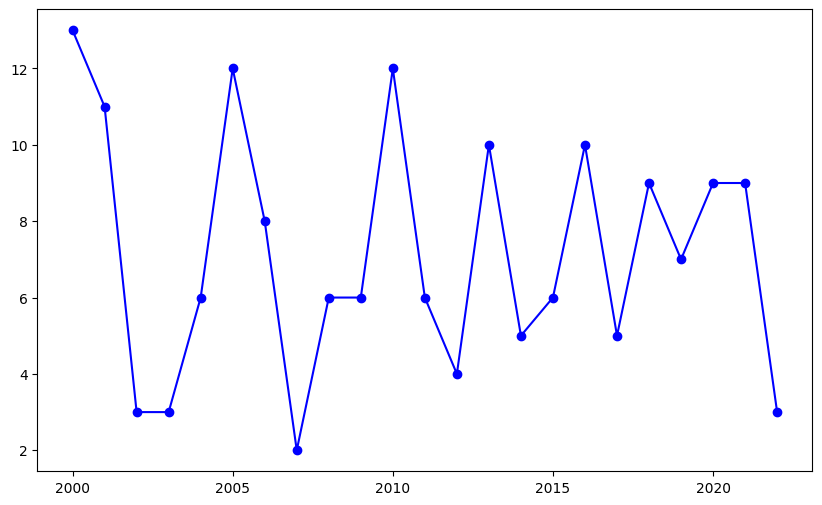

In [12]:
# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_filter['ano'], df_filter['obitos_totais'], marker='o', linestyle='-', color='b')

ndim: verifica a quantidade de dimenões do array
Linhas e colunas no cado 2D


Fazendo previsoões

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# Preparando os dados
X = df_filter[['ano']]  # Variável independente (ano)
y = df_filter['obitos_totais']  # Variável dependente (óbitos)

In [15]:
# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Fazendo previsões para os anos no futuro (exemplo: anos de 2024 até 2030)
anos_futuros = np.array([[2024], [2025], [2026], [2027]])
previsoes = model.predict(anos_futuros)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


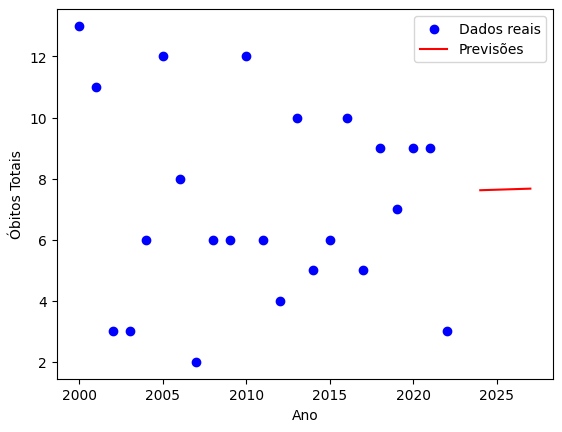

In [18]:
# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(anos_futuros, previsoes, color='red', label='Previsões')
plt.xlabel('Ano')
plt.ylabel('Óbitos Totais')
plt.legend()
plt.show()

In [19]:
# Gerando a reta de regressão para o intervalo de anos disponíveis
anos_range = np.linspace(X['ano'].min(), anos_futuros.max(), 100).reshape(-1, 1)
reta_regressao = model.predict(anos_range)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


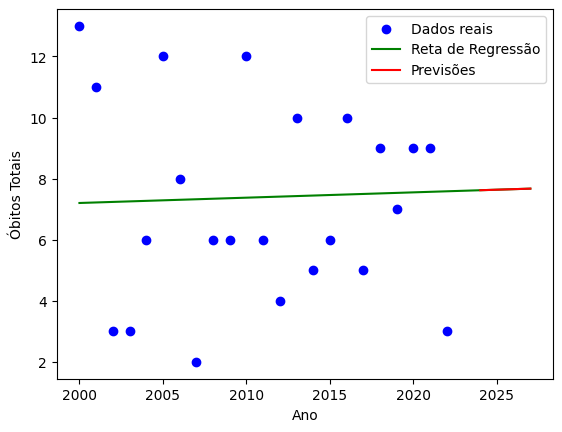

In [20]:
# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(anos_range, reta_regressao, color='green', label='Reta de Regressão')
plt.plot(anos_futuros, previsoes, color='red', label='Previsões')
plt.xlabel('Ano')
plt.ylabel('Óbitos Totais')
plt.legend()
plt.show()

In [21]:
# Exibindo as previsões
for ano, previsao in zip(anos_futuros.flatten(), previsoes):
    print(f'Previsão de óbitos em {ano}: {previsao:.2f}')

Previsão de óbitos em 2024: 7.62
Previsão de óbitos em 2025: 7.64
Previsão de óbitos em 2026: 7.66
Previsão de óbitos em 2027: 7.67


Regressão polinomial

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [23]:
# Criando as características polinomiais (grau 2, por exemplo)
grau_polinomio = 2  # Você pode ajustar o grau para algo maior, se necessário
poly = PolynomialFeatures(degree=grau_polinomio)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [24]:
# Criando e treinando o modelo de regressão polinomial
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
# Fazendo previsões para os anos futuros (exemplo: anos de 2024 até 2030)
anos_futuros = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
anos_futuros_poly = poly.transform(anos_futuros)
previsoes_poly = model_poly.predict(anos_futuros_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [26]:
# Gerando a curva polinomial para o intervalo de anos disponíveis
anos_range = np.linspace(X['ano'].min(), anos_futuros.max(), 100).reshape(-1, 1)
anos_range_poly = poly.transform(anos_range)
curva_polinomial = model_poly.predict(anos_range_poly)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


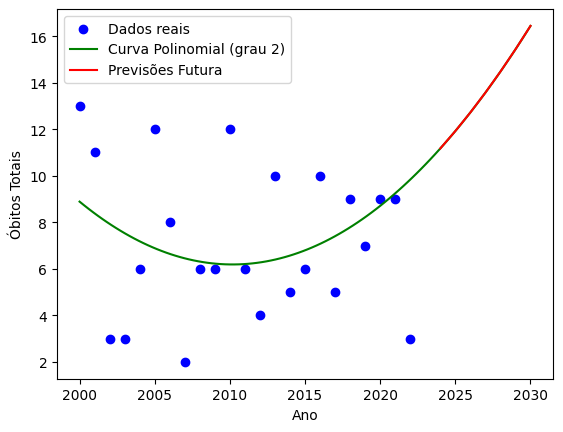

In [27]:
# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(anos_range, curva_polinomial, color='green', label=f'Curva Polinomial (grau {grau_polinomio})')
plt.plot(anos_futuros, previsoes_poly, color='red', label='Previsões Futura')
plt.xlabel('Ano')
plt.ylabel('Óbitos Totais')
plt.legend()
plt.show()

In [28]:
# Exibindo as previsões
for ano, previsao in zip(anos_futuros.flatten(), previsoes_poly):
    print(f'Previsão de óbitos em {ano}: {previsao:.2f}')

Previsão de óbitos em 2024: 11.17
Previsão de óbitos em 2025: 11.92
Previsão de óbitos em 2026: 12.72
Previsão de óbitos em 2027: 13.57
Previsão de óbitos em 2028: 14.48
Previsão de óbitos em 2029: 15.43
Previsão de óbitos em 2030: 16.44


Random Forest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Criando e treinando o modelo de Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Fazendo previsões para os anos futuros (exemplo: anos de 2024 até 2030)
anos_futuros = np.array([[2024], [2025], [2026]])
previsoes_rf = model_rf.predict(anos_futuros)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [33]:
# Gerando as previsões para o intervalo de anos disponíveis
anos_range = np.linspace(X['ano'].min(), anos_futuros.max(), 100).reshape(-1, 1)
previsoes_range_rf = model_rf.predict(anos_range)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


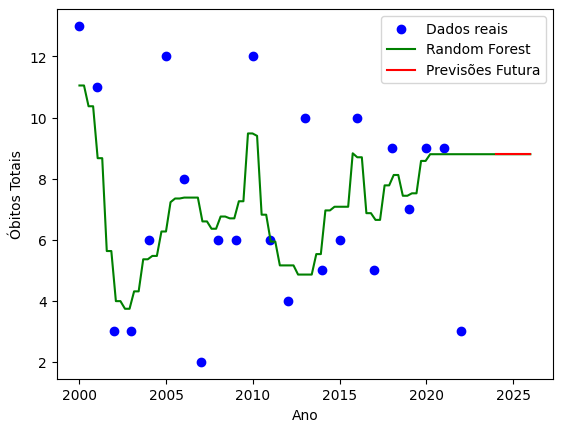

In [34]:
# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(anos_range, previsoes_range_rf, color='green', label='Random Forest')
plt.plot(anos_futuros, previsoes_rf, color='red', label='Previsões Futura')
plt.xlabel('Ano')
plt.ylabel('Óbitos Totais')
plt.legend()
plt.show()

In [35]:
# Exibindo as previsões
for ano, previsao in zip(anos_futuros.flatten(), previsoes_rf):
    print(f'Previsão de óbitos em {ano}: {previsao:.2f}')

Previsão de óbitos em 2024: 8.80
Previsão de óbitos em 2025: 8.80
Previsão de óbitos em 2026: 8.80


Função de base radial

In [36]:
from sklearn.svm import SVR

In [37]:
# Criando e treinando o modelo SVM com kernel RBF
model_svr = SVR(kernel='rbf')
model_svr.fit(X, y)

SVR()

In [38]:
# Fazendo previsões para os anos futuros (exemplo: anos de 2024 até 2030)
previsoes_svr = model_svr.predict(anos_futuros)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [39]:
# Gerando as previsões para o intervalo de anos disponíveis
previsoes_range_svr = model_svr.predict(anos_range)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


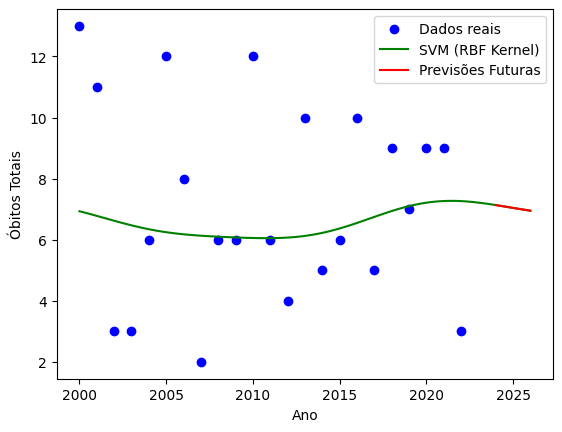

In [40]:
# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(anos_range, previsoes_range_svr, color='green', label='SVM (RBF Kernel)')
plt.plot(anos_futuros, previsoes_svr, color='red', label='Previsões Futuras')
plt.xlabel('Ano')
plt.ylabel('Óbitos Totais')
plt.legend()
plt.show()

In [41]:
# Exibindo as previsões
for ano, previsao in zip(anos_futuros.flatten(), previsoes_svr):
    print(f'Previsão de óbitos em {ano}: {previsao:.2f}')

Previsão de óbitos em 2024: 7.14
Previsão de óbitos em 2025: 7.04
Previsão de óbitos em 2026: 6.95


Rede MLP

In [42]:
from sklearn.neural_network import MLPRegressor

In [43]:
# Criando e treinando o modelo MLP Regressor
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model_mlp.fit(X, y)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

In [44]:
# Fazendo previsões para os anos futuros (exemplo: anos de 2024 até 2030)
previsoes_mlp = model_mlp.predict(anos_futuros)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [45]:
# Gerando as previsões para o intervalo de anos disponíveis
previsoes_range_mlp = model_mlp.predict(anos_range)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


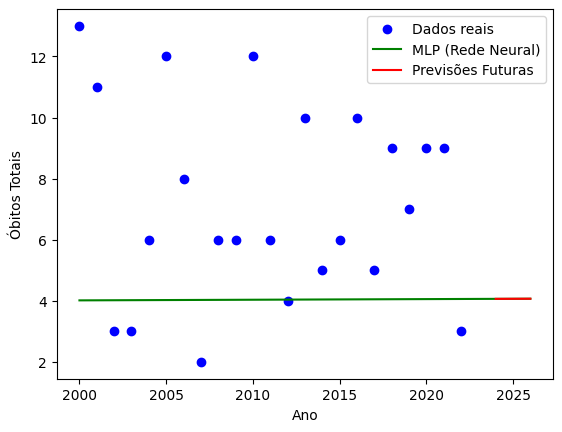

In [46]:
# Plotando o gráfico
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(anos_range, previsoes_range_mlp, color='green', label='MLP (Rede Neural)')
plt.plot(anos_futuros, previsoes_mlp, color='red', label='Previsões Futuras')
plt.xlabel('Ano')
plt.ylabel('Óbitos Totais')
plt.legend()
plt.show()

In [47]:
# Exibindo as previsões
for ano, previsao in zip(anos_futuros.flatten(), previsoes_mlp):
    print(f'Previsão de óbitos em {ano}: {previsao:.2f}')

Previsão de óbitos em 2024: 4.06
Previsão de óbitos em 2025: 4.07
Previsão de óbitos em 2026: 4.07
